In [1]:
from pyfus.io.ustx import TxModule
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
txm = TxModule()

In [3]:
delay_profile = 1
delays = np.arange(64)*1e-6
apodizations = np.ones(64)
frequency = 150e3
cycles = 3
pulse_profile = 1
txm.create_delay_profile(delays=delays, apodizations=apodizations, profile=delay_profile)
txm.create_pulse_profile(frequency=frequency, cycles=cycles, profile=pulse_profile)
dp1 = txm.get_delay_profile(profile=delay_profile)
pp1 = txm.get_pulse_profile(profile=pulse_profile)

delay_profile = 2
x = np.linspace(-0.5, 0.5, 64)*4e-2
r = np.sqrt(x**2 + 5e-2**2)
delays = (r.max()-r)/1500
apodizations = [0,1]*32
frequency = 400e3
cycles = 64
pulse_profile = 2
txm.create_delay_profile(delays=delays, apodizations=apodizations, profile=delay_profile)
txm.create_pulse_profile(frequency=frequency, cycles=cycles, profile=pulse_profile)
dp2 = txm.get_delay_profile(profile=delay_profile)
pp2 = txm.get_pulse_profile(profile=pulse_profile)

In [4]:
dp1['apodizations']

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

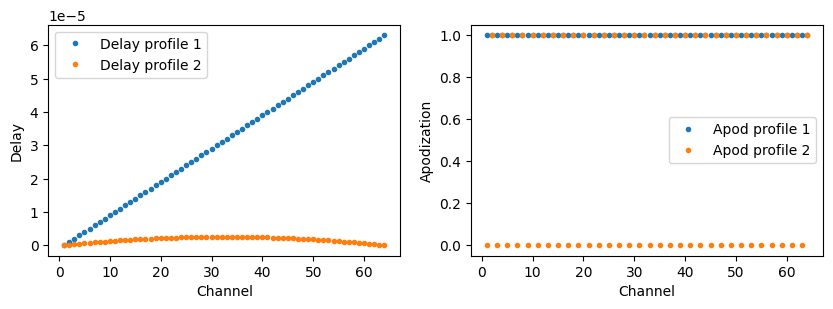

In [5]:
ch = np.arange(1,65)
fig, ax = plt.subplots(1,2, figsize=(10,3))
for i, dp in enumerate([dp1, dp2]):
    ax[0].plot(ch, dp['delays'],'.', label=f'Delay profile {i+1}')
    ax[1].plot(ch, dp['apodizations'],'.', label=f'Apod profile {i+1}')
ax[0].set_ylabel("Delay")
ax[1].set_ylabel("Apodization")
for axi in ax:
    axi.set_xlabel("Channel")
    axi.legend()